In [31]:
from scipy.optimize import curve_fit
from scipy.stats import chisquare, chi2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
#importing data from excel file
path_link = r"C:\Users\GAdmin\Desktop\srp\beam.xlsx"
Data_x = pd.read_excel(path_link)
Data_x = Data_x[['Distance from lens mm', 'beam radius mm', 'stddev mm']]

In [33]:
#standardising units
x_values = Data_x['Distance from lens mm'] * 10**-3 #m
y_values = Data_x['beam radius mm'] * 10**-6        #m
stddev = Data_x['stddev mm'] * 10**-6               #m
stddev

0     7.071068e-07
1     1.435270e-06
2     8.602325e-07
3     5.099020e-07
4     6.782330e-07
5     7.071068e-07
6     3.162278e-07
7     3.162278e-07
8     2.449490e-07
9     3.162278e-07
10    7.071068e-07
11    3.741657e-07
12    8.602325e-07
13    8.366600e-07
14    7.071068e-07
Name: stddev mm, dtype: float64

In [34]:
#curve fitting
wavelength = 532 * 10**-9 #m

def waist_func(z, w0, z0, Zrm):
    return w0 * np.sqrt(1 + (((z - z0) ** 2) / (Zrm**2)))

popt, pcov = curve_fit(waist_func, x_values, y_values, sigma=stddev, p0 = [0.0002, 0.6, 0.02])

print("Optimal parameters", popt)

w0, z0, Zrm = popt

unc_w0 = pcov[0,0]**0.5
unc_z0 = pcov[1,1]**0.5
unc_Zrm = pcov[2,2]**0.5

Optimal parameters [4.50712422e-05 5.71897514e-01 2.61810473e-02]


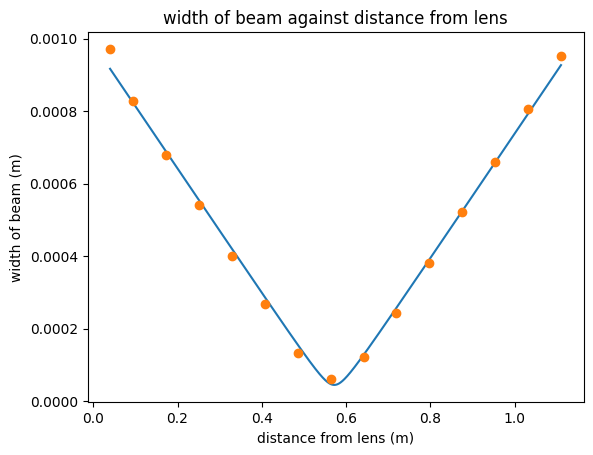

In [35]:
dx = np.linspace(0.03992, 1.10976, 10000)
y_fit = waist_func(dx, w0, z0, Zrm)

#plotting equation with fitted variables (X axis) 
plt.xlabel("distance from lens (m)")
plt.ylabel("width of beam (m)")
plt.title("width of beam against distance from lens")
plt.plot(dx, y_fit)
plt.errorbar(x_values, y_values, fmt = 'o',  yerr=stddev, capsize=3, ecolor = "black")
plt.show()

In [52]:
#Calculating parameters
def parameters(w0, Zrm):
    beam_divergence_angle = w0/Zrm
    unc_bda = (unc_w0 + unc_Zrm) * beam_divergence_angle
    m_squared_value = (np.pi*w0**2)/(wavelength*Zrm)
    unc_m2 = (2 * unc_w0 + unc_Zrm) * m_squared_value

    return beam_divergence_angle, m_squared_value, unc_bda, unc_m2

beam_divergence_angle, m_squared_value, unc_bda, unc_m2 = parameters(w0, Zrm)

print("waist: ", w0, "m +-", unc_w0)
print("rayleigh range: ", Zrm, "m +-", unc_Zrm)
print("beam divergence angle: ", beam_divergence_angle, "m +-", unc_bda)
print("M^2 value: ", m_squared_value, "m +-", unc_m2)

waist:  4.5071242179494675e-05 m +- 1.208238800684637e-05
rayleigh range:  0.026181047345331145 m +- 0.007104727259092523
beam divergence angle:  0.0017215217399441513 m +- 1.2251742526525827e-05
M^2 value:  0.45819493009777695 m +- 0.0032664221877000917


In [47]:
def chisq(obs, exp):
    frac = (obs - exp) ** 2 / exp
    return np.sum(frac)

chi_sq = chisq(y_values, waist_func(x_values, w0, z0, Zrm))
reduced_chisq = chi_sq / (len(y_values)-1)
reduced_chisq #the lower the better

1.1738600280789487e-06

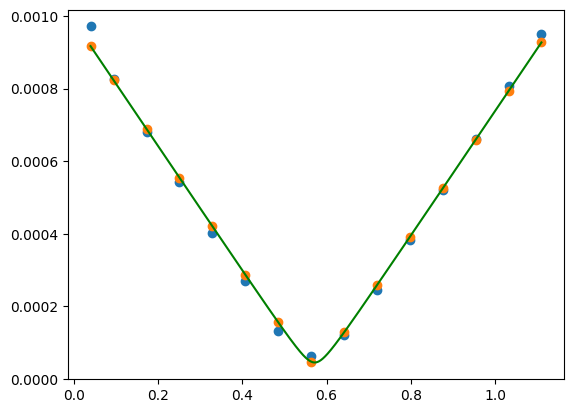

In [51]:
from turtle import color


plt.scatter(x_values, y_values)
plt.scatter(x_values, waist_func(x_values, w0, z0, Zrm))

dx = np.linspace(0.03992, 1.10976, 10000)
y_fit = waist_func(dx, w0, z0, Zrm)
plt.plot(dx, y_fit, color='green')